In [1]:
!pip install requests beautifulsoup4 pandas

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = "https://books.toscrape.com/catalogue/page-1.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
titles = []
prices = []
ratings = []
availability = []

for page in range(1, 6):  # scrape first 5 pages
    url = f"https://books.toscrape.com/catalogue/page-{page}.html"
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    books = soup.find_all('article', class_='product_pod')

    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        rating = book.p['class'][1]
        stock = book.find('p', class_='instock availability').text.strip()

        titles.append(title)
        prices.append(price)
        ratings.append(rating)
        availability.append(stock)

In [7]:
df = pd.DataFrame({
    'Title': titles,
    'Price': prices,
    'Rating': ratings,
    'Availability': availability
})

df.head(10)

,Title,Price,Rating,Availability
0,A Light in the Attic,Â£51.77,Three,In stock
1,Tipping the Velvet,Â£53.74,One,In stock
2,Soumission,Â£50.10,One,In stock
3,Sharp Objects,Â£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock
5,The Requiem Red,Â£22.65,One,In stock
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,Four,In stock
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,Three,In stock
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,Four,In stock
9,The Black Maria,Â£52.15,One,In stock


In [8]:
df.to_csv("books_data.csv", index=False)

In [16]:
df['Rating'].value_counts()

,count
Rating,
Three,22
One,22
Five,19
Two,19
Four,18


In [18]:
df['Price'] = (
    df['Price']
    .astype(str)              # convert back to string
    .str.replace('Â£', '', regex=False)
    .str.replace('£', '', regex=False)
    .astype(float)
)

df.sort_values(by='Price', ascending=False).head()

,Title,Price,Rating,Availability
68,The Death of Humanity: and the Case for Life,58.11,Four,In stock
40,Slow States of Collapse: Poems,57.31,Three,In stock
15,Our Band Could Be Your Life: Scenes from the A...,57.25,Three,In stock
58,The Past Never Ends,56.50,Four,In stock
57,The Pioneer Woman Cooks: Dinnertime: Comfort C...,56.41,One,In stock


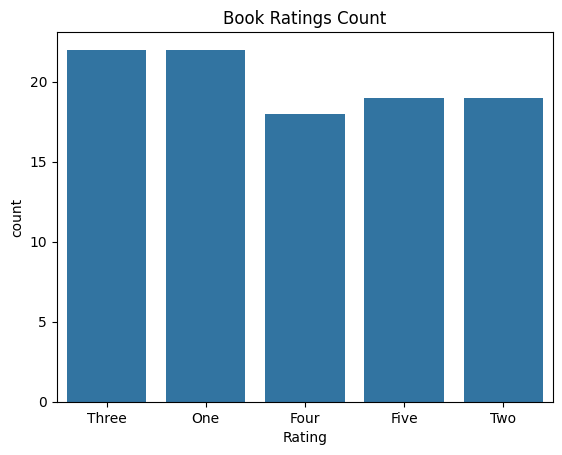

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Rating', data=df)
plt.title("Book Ratings Count")
plt.show()